In [1]:
import pandas as pd
import numpy as np
import Levenshtein
import re
from  translate import Translator
from sklearn.cluster import KMeans
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score
from tensorflow.keras.layers import Input, Dense, Lambda, Layer
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.losses import mse
import tensorflow as tf
import matplotlib.pyplot as plt

translator = Translator(to_lang="en")


In [2]:
unique = pd.read_csv("../dataset/result_cleaning_data.csv")
data = pd.read_csv("../dataset/cleaned_data.csv")

print(unique.head())
print(data.head())

C:\Users\Rizal\AppData\Local\Temp\ipykernel_16568\1811373139.py:2: DtypeWarning: Columns (194,195,196,250,258,261,262,263,270,271,272,273,274,275,317,330,332,333,337,338,339,340,344,345,346,347,351,352,353,354,358,359,360,361,365,366,367,368,372,373,374,375,379,380,381,382,384,385,386,387,389,390,408,460,469,478,485,487,488,494,495,496,497,498,503,504,505,506,507,512,513,514,515,516,521,522,523,524,525,528,529,530,531,532,613,622,624,625,626,646,647,648,649,650,651,659,660,661,662,663,668,669,670,671,672,677,678,679,680,681,691,692,696,697,702,703,704,709,710,711,718,719,720,727,728,729,736,737,738,746,747,748,749,750,755,756,757,758,759,764,765,766,767,768,773,774,775,776,777,782,783,784,785,786,791,792,793,794,795,800,801,802,803,804,809,810,811,812,813,818,819,820,821,822,827,828,829,830,831,836,837,838,839,840,845,846,847,848,849,850,851,860,861,862,866,867,868,872,873,874,875,876,877,878,879,880,881,882,883,884,885,899,900,901,906,907,908,913,914,915,920,921,922,927,928,929,934,93

   Unnamed: 0                      0                  1           2  \
0           0      software engineer             intern     manager   
1           1       computer science            general  management   
2           2  boy scouts of america           sciences  technology   
3           3  boy scouts of america           sciences  technology   
4           4                   inc.  software engineer       owner   

                         3                        4                       5  \
0       research assistant                 director         project manager   
1  business administration                  finance  mechanical engineering   
2        purdue university  the university of texas           college board   
3        purdue university  the university of texas           college board   
4                      llc                  founder                director   

                        6                         7                         8  \
0                

**experiences/{j}/title**

In [3]:
data["accomplishment_honors_awards/0/issuer"]

0                                       NaN
1                                       NaN
2       Stamps Family Charitable Foundation
3                                       NaN
4                                       NaN
                       ...                 
8934                                    NaN
8935                                      -
8936                                    SAP
8937                                    NaN
8938                                    NaN
Name: accomplishment_honors_awards/0/issuer, Length: 8939, dtype: object

In [4]:
max_num = 0
for i in range(83):
    try:
        print(data[f"accomplishment_honors_awards/{i}/issuer"])
    except:
        break
    max_num = i

max_num

0                                       NaN
1                                       NaN
2       Stamps Family Charitable Foundation
3                                       NaN
4                                       NaN
                       ...                 
8934                                    NaN
8935                                      -
8936                                    SAP
8937                                    NaN
8938                                    NaN
Name: accomplishment_honors_awards/0/issuer, Length: 8939, dtype: object
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8934    NaN
8935      -
8936    SAP
8937    NaN
8938    NaN
Name: accomplishment_honors_awards/1/issuer, Length: 8939, dtype: object
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8934    NaN
8935    NaN
8936    NaN
8937    NaN
8938    NaN
Name: accomplishment_honors_awards/2/issuer, Length: 8939, dtype: object
0       NaN
1       NaN
2       N

22

In [5]:
data = data[[f"accomplishment_honors_awards/{i}/issuer"  if i > 0 else "full_name" for i in range(22)]]

data

,full_name,accomplishment_honors_awards/1/issuer,accomplishment_honors_awards/2/issuer,accomplishment_honors_awards/3/issuer,accomplishment_honors_awards/4/issuer,accomplishment_honors_awards/5/issuer,accomplishment_honors_awards/6/issuer,accomplishment_honors_awards/7/issuer,accomplishment_honors_awards/8/issuer,accomplishment_honors_awards/9/issuer,...,accomplishment_honors_awards/12/issuer,accomplishment_honors_awards/13/issuer,accomplishment_honors_awards/14/issuer,accomplishment_honors_awards/15/issuer,accomplishment_honors_awards/16/issuer,accomplishment_honors_awards/17/issuer,accomplishment_honors_awards/18/issuer,accomplishment_honors_awards/19/issuer,accomplishment_honors_awards/20/issuer,accomplishment_honors_awards/21/issuer
0,Jeff B.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andrew Bailey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alex Cabrera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alcino de Oliveira Manuel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ali Farhat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8934,Aaron Dolores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8935,"Aaron Dominy, MBA",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8936,Aaron Williams,SAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8937,Aaron Dona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
colomns = unique.iloc[0].dropna()
colomns

Unnamed: 0                                           0
0                                    software engineer
1                                               intern
2                                              manager
3                                   research assistant
                                ...                   
6059                            lead network architect
6060          satellite communication systems operator
6061                                 electrical intern
6062                     talent acquisition consultant
6063                 seasonal parks maintenance worker
Name: 0, Length: 6065, dtype: object

In [7]:
colomns = [str(col) for col in colomns.to_list()]
colomns

['0',
 'software engineer',
 'intern',
 'manager',
 'research assistant',
 'director',
 'project manager',
 'founder',
 'owner',
 'sales associate',
 'consultant',
 'co-founder',
 'president',
 'teaching assistant',
 'senior software engineer',
 'vice president',
 'marketing',
 'ceo',
 'associate',
 'software developer',
 'product manager',
 'graphic designer',
 'graduate research assistant',
 'summer intern',
 'account executive',
 'analyst',
 'sales',
 'administrative assistant',
 'marketing intern',
 'account manager',
 'senior manager',
 'software engineer intern',
 'graduate teaching assistant',
 'general manager',
 'business analyst',
 'research intern',
 'web developer',
 'senior consultant',
 'cashier',
 'assistant manager',
 'server',
 'operations manager',
 'operations',
 'data analyst',
 'customer service representative',
 'program manager',
 'business development',
 'marketing manager',
 'undergraduate research assistant',
 'software engineering intern',
 'br',
 'research',

Pencarian kedekatan dengan menggunakan cosine similarity\
Cosine Similarity mengukur kesamaan antara dua vektor dengan mengukur sudut kosinus di antara keduanya. Dengan menggunakan TF-IDF (Term Frequency-Inverse Document Frequency), Anda bisa mengonversi kalimat menjadi vektor yang merepresentasikan pentingnya kata-kata dalam kalimat tersebut.

In [8]:

def most_similarity(input_word, data):
    most_similar_word = None
    highest_similarity = -1

    for word in data:
        distance = Levenshtein.distance(input_word, word)
        similarity = 1 - (distance / max(len(input_word), len(word)))

        if similarity > highest_similarity:
            highest_similarity = similarity
            most_similar_word = word

    return most_similar_word

input_word = "kardi"

sample = ["Kardus", "Karpet", "Karikatur"]

output = most_similarity(input_word, sample)

print(output)  


Kardus


In [9]:
def extract_each_title(title_list):
    exp_titles = []
    for exp_title in title_list:
        parts = str(exp_title).lower().replace("and", ",").replace("|", ",").replace("/", ",").replace("&", ",")\
            .replace(" – ", ",").replace(" - ", ",").split(",")
        
        parts = [part.strip() for part in parts]
        
        parts = [part.split(" at ")[0].strip() for part in parts]
        parts = [part.split(" on ")[0].strip() for part in parts]
        parts = [part for part in parts if len(part) > 1]
        parts = [re.sub(r"[()]", "", part) for part in parts]
        parts = [translator.translate(part) for part in parts]
        
        exp_titles.extend(parts)
    # print(exp_titles)
    return exp_titles

title_each_people = [extract_each_title(data.drop(columns="full_name").iloc[i].dropna()) for i in range(len(data))]
title_each_people


[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['ece',
  'old dominion university',
  'society of vacuum coaters foundation',
  'amar ekushey hall',
  'university of dhaka'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['king faisal university', 'saudi ladies institute'],
 [],
 [],
 [],
 [],
 [],
 ['university of south florida',
  'global citizens project',
  'global citizens project'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['georgia institute of technology',
  'georgia tech office of international education',
  'georgia tech office for undergraduate research opportunities',
  'georgia institute of technology'],
 [],
 [],
 [],
 [],
 ['texas a', 'm university', "may's business school"],
 [],
 ['erik johnson school of engineering'],
 [],
 [],
 [],
 [],
 ['mmc communication arts deparment',
  'marymount manhattan college',
  'julie zenobi',
  'urban arts partnership',
  'new design high school'],
 [],
 [],
 [],

In [10]:
title_each_people = [title for title in title_each_people if len(title) != 0]
title_each_people

[['ece',
  'old dominion university',
  'society of vacuum coaters foundation',
  'amar ekushey hall',
  'university of dhaka'],
 ['king faisal university', 'saudi ladies institute'],
 ['university of south florida',
  'global citizens project',
  'global citizens project'],
 ['georgia institute of technology',
  'georgia tech office of international education',
  'georgia tech office for undergraduate research opportunities',
  'georgia institute of technology'],
 ['texas a', 'm university', "may's business school"],
 ['erik johnson school of engineering'],
 ['mmc communication arts deparment',
  'marymount manhattan college',
  'julie zenobi',
  'urban arts partnership',
  'new design high school'],
 ['jtb global marketing',
  'travels',
  'panasonic corp.',
  'panasonic corp.',
  'royal embassy of saudi arabia',
  'crown princess of saudi arabia organisation',
  'royal embassy of saudi arabia',
  'royal embassy of saudi arabia',
  'royal embassy of saudi arabia in tokyo',
  'governm

In [11]:
np.zeros(len(colomns))

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
index_col = {}

for i in range(len(colomns)):
    index_col[colomns[i]] = i

index_col

{'0': 0,
 'software engineer': 1,
 'intern': 2,
 'manager': 3,
 'research assistant': 4,
 'director': 5,
 'project manager': 6,
 'founder': 7,
 'owner': 8,
 'sales associate': 9,
 'consultant': 10,
 'co-founder': 11,
 'president': 12,
 'teaching assistant': 13,
 'senior software engineer': 14,
 'vice president': 15,
 'marketing': 16,
 'ceo': 17,
 'associate': 18,
 'software developer': 19,
 'product manager': 20,
 'graphic designer': 21,
 'graduate research assistant': 22,
 'summer intern': 23,
 'account executive': 24,
 'analyst': 25,
 'sales': 26,
 'administrative assistant': 27,
 'marketing intern': 28,
 'account manager': 29,
 'senior manager': 30,
 'software engineer intern': 31,
 'graduate teaching assistant': 32,
 'general manager': 33,
 'business analyst': 34,
 'research intern': 35,
 'web developer': 36,
 'senior consultant': 37,
 'cashier': 38,
 'assistant manager': 39,
 'server': 40,
 'operations manager': 41,
 'operations': 42,
 'data analyst': 43,
 'customer service repres

In [13]:
def sentences_count(titles):
    frequency = [0 for i in range(len(colomns))]

    normalize_data = [most_similarity(title, colomns) for title in titles]

    for title in normalize_data:
        frequency[index_col[title]] += 1
    return frequency

title_frequencies = [sentences_count(title) for title in title_each_people ]
title_frequencies
    

In [ ]:
title_each_people[0]

['international business', 'spanish language', 'literature']

In [ ]:
new_data = pd.DataFrame(title_frequencies, columns=colomns).drop(columns="0")
new_data

,software engineer,intern,manager,research assistant,director,project manager,founder,owner,sales associate,consultant,...,communications security comsec accountant,programme manager,training services manager,consumer services support lead,data center technician,lead network architect,satellite communication systems operator,electrical intern,talent acquisition consultant,seasonal parks maintenance worker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Parameter VAE
input_dim = new_data.shape[1]
intermediate_dim = 64
latent_dim = 2

# Encoder
inputs = Input(shape=(input_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)

z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(input_dim, activation='sigmoid')

h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# VAE model
vae = Model(inputs, x_decoded_mean)

# Compute VAE loss
reconstruction_loss = mse(inputs, x_decoded_mean)
reconstruction_loss *= input_dim
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Train the VAE
vae.fit(new_data, epochs=100, batch_size=2, shuffle=True)





Epoch 1/100
2099/2099 [==============================] - 81s 32ms/step - loss: 62.8994
Epoch 2/100
2099/2099 [==============================] - 70s 33ms/step - loss: 2.9009
Epoch 3/100
2099/2099 [==============================] - 67s 32ms/step - loss: 2.6086
Epoch 4/100
2099/2099 [==============================] - 66s 31ms/step - loss: 2.5754
Epoch 5/100
2099/2099 [==============================] - 64s 31ms/step - loss: 2.5694
Epoch 6/100
2099/2099 [==============================] - 71s 34ms/step - loss: 2.5669
Epoch 7/100
2099/2099 [==============================] - 76s 36ms/step - loss: 2.5636
Epoch 8/100
2099/2099 [==============================] - 75s 36ms/step - loss: 2.5623
Epoch 9/100
2099/2099 [==============================] - 75s 36ms/step - loss: 2.5615
Epoch 10/100
2099/2099 [==============================] - 86s 41ms/step - loss: 2.5611
Epoch 11/100
2099/2099 [==============================] - 74s 35ms/step - loss: 2.5610
Epoch 12/100
2099/2099 [========================

In [ ]:
new_data.shape

(4198, 6064)

In [ ]:
# Define encoder model to extract latent space
encoder = Model(inputs, z_mean)

# Ekstraksi fitur kompresi dari latent space
compressed_features = encoder.predict(new_data.to_numpy())
print(compressed_features)


132/132 [==============================] - 2s 6ms/step
[[-0.0008537   0.00055953]
 [-0.0011514   0.00053747]
 [-0.00124772  0.00053034]
 ...
 [-0.00174483  0.00049352]
 [-0.00305769  0.00039627]
 [-0.0002853   0.00060163]]


In [ ]:
input_dim = new_data.shape[1]  # Sesuaikan dengan data Anda
intermediate_dim = 500  # Ukuran layer intermediate, dapat disesuaikan
latent_dim = compressed_features.shape[1]  # Dimensi latent space
n_clusters = 3  # Jumlah cluster

# Clustering layer
class ClusteringLayer(Layer):
    def __init__(self, n_clusters, **kwargs):
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters

    def build(self, input_shape):
        self.input_dim = input_shape[1]
        self.clusters = self.add_weight(shape=(self.n_clusters, self.input_dim), initializer='glorot_uniform', name='clusters')

    def call(self, inputs, **kwargs):
        q = 1.0 / (1.0 + K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2))
        q **= (self.input_dim + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1))
        return q

# Define DEC model
inputs = Input(shape=(input_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)

z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# DEC specific layers
clustering_layer = ClusteringLayer(n_clusters, name='clustering')(z)
dec = Model(inputs, clustering_layer)

kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(compressed_features)
dec.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])

# Custom training loop
optimizer = SGD(0.01, 0.9)

# Convert inputs to TensorFlow variable
X_tf = tf.convert_to_tensor(new_data.to_numpy(), dtype=tf.float32)

epochs = 100
batch_size = 2

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        q = dec(X_tf)
        p = tf.pow(q, 2) / tf.reduce_sum(q, axis=0)
        p /= tf.reduce_sum(p, axis=1, keepdims=True)
        loss = tf.reduce_mean(tf.keras.losses.KLD(p, q))
    grads = tape.gradient(loss, dec.trainable_weights)
    optimizer.apply_gradients(zip(grads, dec.trainable_weights))
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

# Assign clusters to data points
q = dec.predict(new_data.to_numpy())
y_pred_final = q.argmax(1)

# Menampilkan hasil clustering
new_data['Cluster'] = y_pred_final
print(new_data)

Epoch 0, Loss: 9.321245784121857e-07
Epoch 10, Loss: 7.252468208207574e-07
Epoch 20, Loss: 4.382845588679629e-07
Epoch 30, Loss: 2.1842033959273977e-07
Epoch 40, Loss: 9.823391877716858e-08
Epoch 50, Loss: 4.030525602161106e-08
Epoch 60, Loss: 1.2815273287003492e-08
Epoch 70, Loss: 1.3760526051953548e-09
Epoch 80, Loss: -7.654452183203375e-09
Epoch 90, Loss: -1.2052839615250832e-08
132/132 [==============================] - 3s 20ms/step
      software engineer  intern  manager  research assistant  director  \
0                     0       0        0                   0         0   
1                     0       0        0                   0         0   
2                     0       0        0                   0         0   
3                     0       0        0                   0         0   
4                     0       0        0                   0         0   
...                 ...     ...      ...                 ...       ...   
4193                  0       0        0 

In [ ]:
print(compressed_features.shape)  # Pastikan ini sesuai dengan latent_dim yang diharapkan


(4198, 2)


In [ ]:
new_data["Cluster"].value_counts()

Cluster
0    2117
1    2081
Name: count, dtype: int64

In [ ]:
# Menghitung Silhouette Score
score = silhouette_score(compressed_features, y_pred_final)
print(f'Silhouette Score: {score}')


Silhouette Score: -4.888643525191583e-05


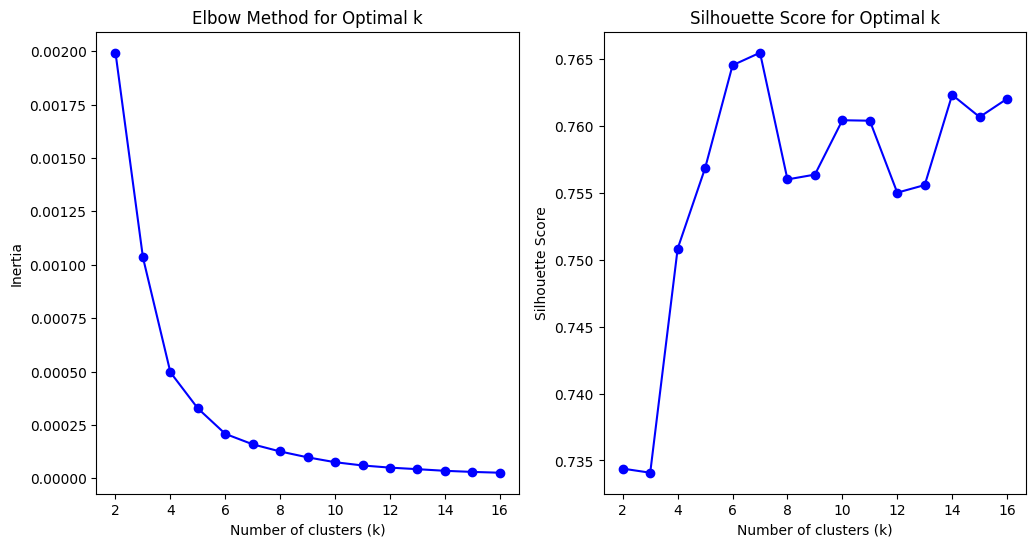

Best k based on Silhouette Score: 7


In [ ]:
def find_best_k(data, max_k=16):
    inertia = []
    silhouette_scores = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=20)
        kmeans.fit(data)
        
        # Append inertia (within-cluster sum of squares)
        inertia.append(kmeans.inertia_)
        
        # Compute silhouette score
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)

    # Plotting the Elbow Method
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_k + 1), inertia, 'bo-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.

    # Plotting the Silhouette Score
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_k + 1), silhouette_scores, 'bo-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Optimal k')

    plt.show()

    # Best k based on silhouette score
    best_k = silhouette_scores.index(max(silhouette_scores)) + 2
    print(f'Best k based on Silhouette Score: {best_k}')

    return best_k

# Assuming compressed_features is your data after feature extraction
best_k = find_best_k(compressed_features, max_k=16)

In [ ]:
input_dim = new_data.shape[1]  # Sesuaikan dengan data Anda
intermediate_dim = 500  # Ukuran layer intermediate, dapat disesuaikan
latent_dim = compressed_features.shape[1]  # Dimensi latent space
n_clusters = 4  # Jumlah cluster


# Define DEC model
inputs = Input(shape=(input_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)

z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# DEC specific layers
clustering_layer = ClusteringLayer(n_clusters, name='clustering')(z)
dec = Model(inputs, clustering_layer)

kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(compressed_features)
dec.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])

# Custom training loop
optimizer = SGD(0.01, 0.9)

# Convert inputs to TensorFlow variable
X_tf = tf.convert_to_tensor(new_data.to_numpy(), dtype=tf.float32)

epochs = 100
batch_size = 2

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        q = dec(X_tf)
        p = tf.pow(q, 2) / tf.reduce_sum(q, axis=0)
        p /= tf.reduce_sum(p, axis=1, keepdims=True)
        loss = tf.reduce_mean(tf.keras.losses.KLD(p, q))
    grads = tape.gradient(loss, dec.trainable_weights)
    optimizer.apply_gradients(zip(grads, dec.trainable_weights))
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

# Assign clusters to data points
q = dec.predict(new_data.to_numpy())
y_pred_final = q.argmax(1)

# Menampilkan hasil clustering
new_data['Cluster'] = y_pred_final
print(new_data)

Epoch 0, Loss: 2.139975322279497e-06
Epoch 10, Loss: 1.7167556052299915e-06
Epoch 20, Loss: 1.2263918733879109e-06
Epoch 30, Loss: 7.633960876773926e-07
Epoch 40, Loss: 4.5381520408227516e-07
Epoch 50, Loss: 2.6134773634112207e-07
Epoch 60, Loss: 1.4412420057396957e-07
Epoch 70, Loss: 8.162879794326727e-08
Epoch 80, Loss: 4.865073321980162e-08
Epoch 90, Loss: 2.9048267791154103e-08
132/132 [==============================] - 2s 13ms/step
      software engineer  intern  manager  research assistant  director  \
0                     0       0        0                   0         0   
1                     0       0        0                   0         0   
2                     0       0        0                   0         0   
3                     0       0        0                   0         0   
4                     0       0        0                   0         0   
...                 ...     ...      ...                 ...       ...   
4193                  0       0        0 

In [ ]:
vae.save('../model/acc_award/vae_model.h5')
dec.save('../model/acc_award/dec_model.h5')

c:\Users\Rizal\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
